In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [21]:
stock = pd.read_csv("/Users/macbookpro_anas/Desktop/Destroy Inflation/DestroyInflation-master/stock_data/AAPL.csv")

In [22]:
stock['Date'] = pd.to_datetime(stock.Date)

In [23]:
# df.iloc permet de sélectionner les lignes
# Ici, on récupère les 30 dernières années d'historique.
# Il y a en moyenne moins de 252 jours d'ouverture des marchés par an (weekends + jours fériés)
stock = stock.iloc[-252*30:]

In [24]:
# Création d'un dataset clone indexé par le temps pour le manipuler tout en conservant l'original
stock_df = stock.set_index('Date')
stock_df

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
1990-01-23,1.205357,1.223214,1.178571,1.205357,0.979819,35218400.0
1990-01-24,1.160714,1.223214,1.151786,1.214286,0.987077,42448000.0
1990-01-25,1.223214,1.241071,1.214286,1.218750,0.990705,27885200.0
1990-01-26,1.214286,1.214286,1.151786,1.169643,0.950787,45312400.0
1990-01-29,1.178571,1.196429,1.147321,1.187500,0.965303,29982400.0
...,...,...,...,...,...,...
2020-01-17,316.269989,318.739990,315.000000,318.730011,318.730011,34454100.0
2020-01-21,317.190002,319.019989,316.000000,316.570007,316.570007,27710800.0
2020-01-22,318.579987,319.989990,317.309998,317.700012,317.700012,25458100.0


In [25]:
# Comment on agrège les données par unité de temps
resampled = stock_df.resample('1M').agg({'Open': (lambda x: x.iloc[0]),
                                         'High': 'max',
                                         'Low': 'min',
                                         'Close': (lambda x: x.iloc[-1]),
                                         'Adj Close': (lambda x: x.iloc[-1]),
                                         'Volume': 'sum'})

In [26]:
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = (0.5, 0.5, 0.5)

In [27]:
monthly_returns = resampled['Adj Close'].rolling(window=2).apply(lambda x: x[1]/x[0] - 1)
monthly_returns

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


Date
1990-01-31         NaN
1990-02-28    0.003223
1990-03-31    0.183825
1990-04-30   -0.021739
1990-05-31    0.050527
                ...   
2019-09-30    0.072962
2019-10-31    0.110684
2019-11-30    0.077554
2019-12-31    0.098784
2020-01-31    0.083978
Freq: M, Name: Adj Close, Length: 361, dtype: float64

In [28]:
# On a le NaN à la première ligne car on n'a pas de données sur un jour avant le premier
# Il suffit de drop la valeur NaN, ou de la remplacer par 0
monthly_returns = monthly_returns.dropna()
# Ou : monthly_returns.dropna(inplace=True)

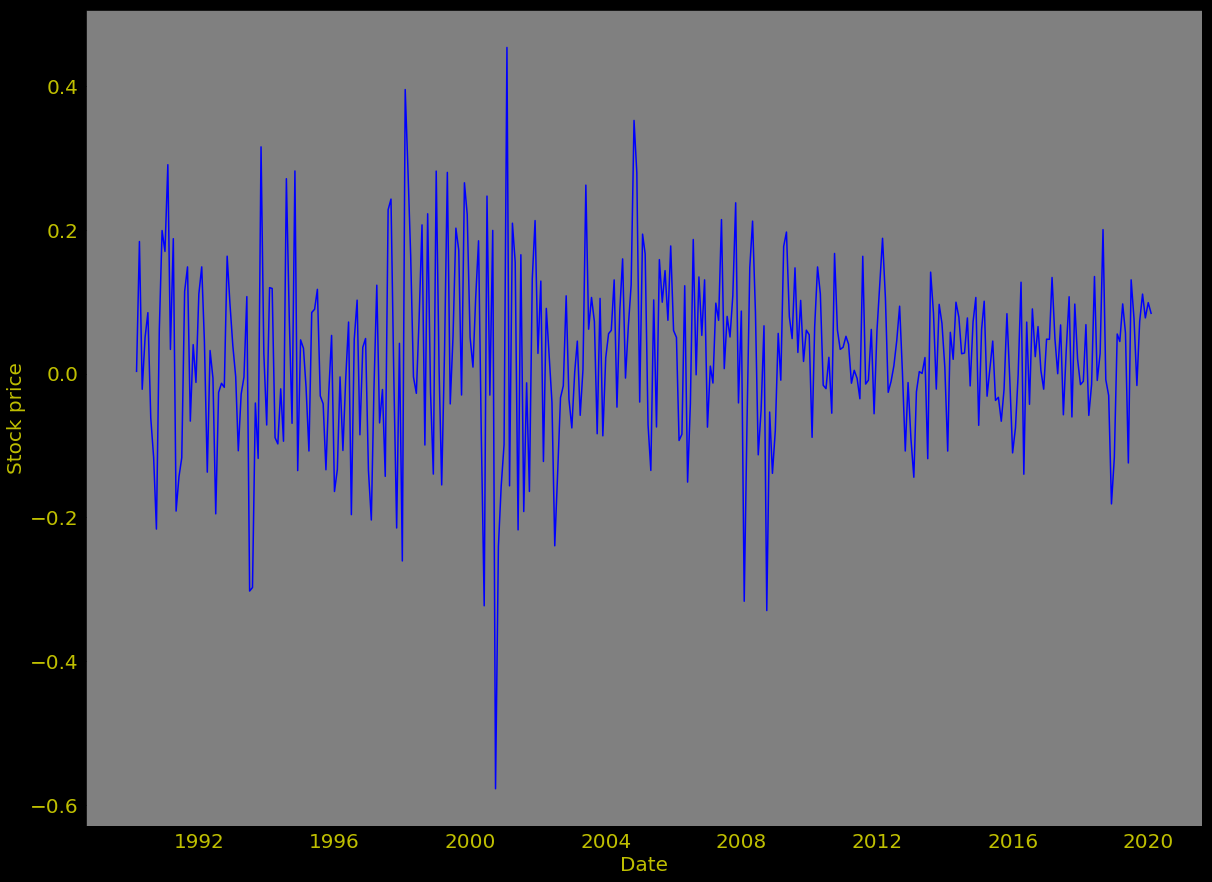

In [29]:
plt.rcParams['figure.facecolor'] = 'black'
plt.rcParams['axes.facecolor'] = (0.5, 0.5, 0.5)

plt.figure(figsize=(20,15))
plt.plot(monthly_returns, color='b')
plt.xticks(color='y', size=20)
plt.yticks(color='y', size=20)
plt.xlabel("Date", size=20, color='y')
plt.ylabel("Stock price", size=20, color='y')
plt.show()

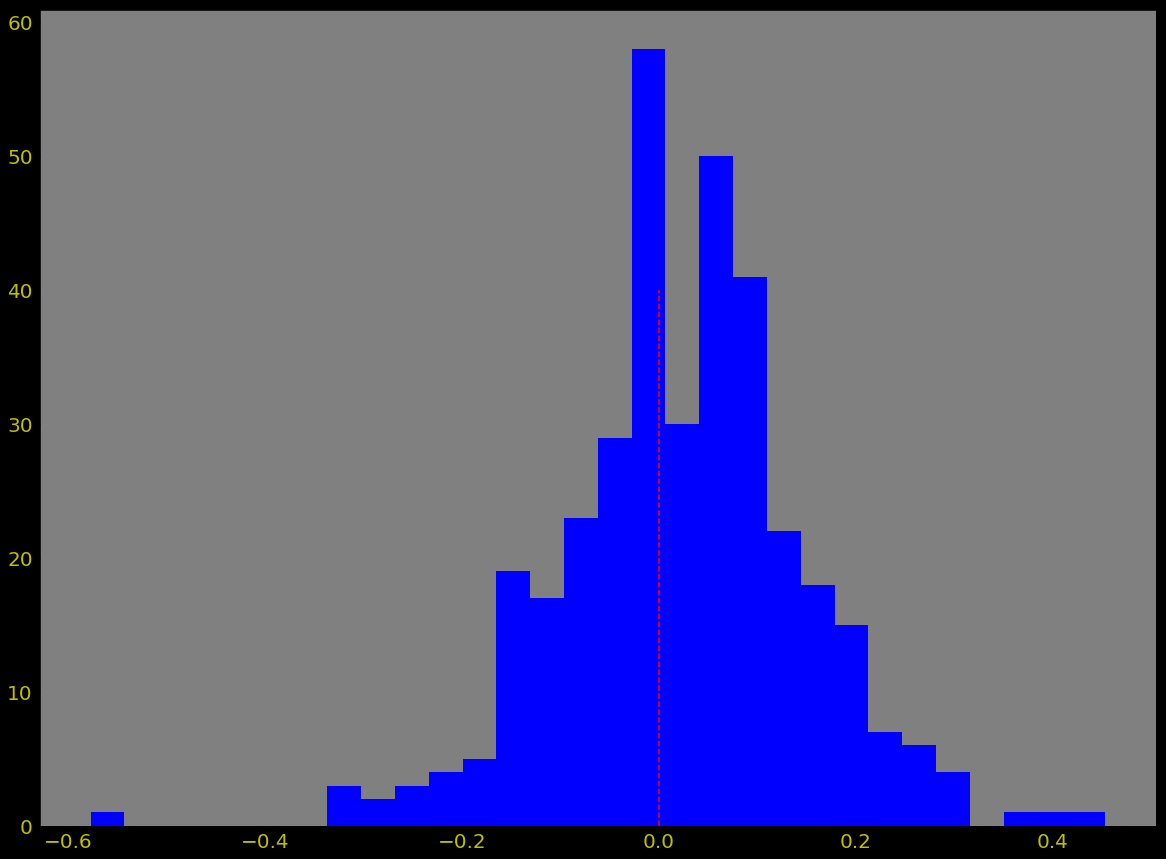

In [30]:
plt.figure(figsize=(20,15))
plt.hist(monthly_returns, color='b', bins=30)
plt.plot([0.,0.], [0,40], 'r--')
plt.xticks(color='y', fontsize=20)
plt.yticks(color='y', fontsize=20)
plt.show()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:5: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """


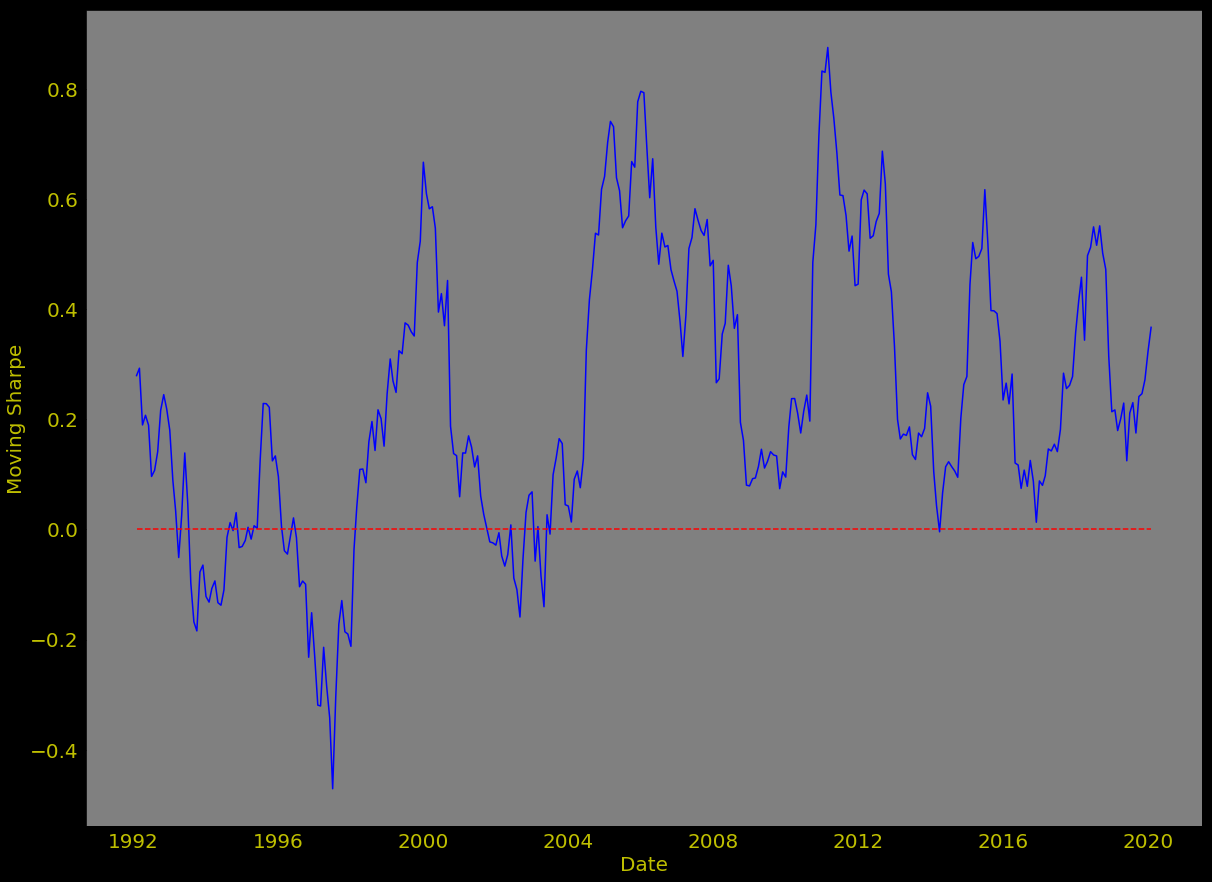

In [31]:
def sharpe(s):
    return np.mean(s)/np.std(s)

#Sharpe ratio calculated over a 2 yrs period
sharpe_ = monthly_returns.rolling(window=24).apply(sharpe).dropna()

plt.figure(figsize=(20,15))
plt.plot(sharpe_, color='b')
plt.plot(pd.Series(np.zeros(sharpe_.shape), index=sharpe_.index), 'r--')
plt.xticks(color='y', size=20)
plt.yticks(color='y', size=20)
plt.xlabel("Date", size=20, color='y')
plt.ylabel("Moving Sharpe", size=20, color='y')
plt.show()

In [32]:
weekly_df = stock_df.resample('1W').agg({'Open': (lambda x: x.iloc[0]),
                                         'High': 'max',
                                         'Low': 'min',
                                         'Close': (lambda x: x.iloc[-1]),
                                         'Adj Close': (lambda x: x.iloc[-1]),
                                         'Volume': 'sum'})

In [33]:
weekly_2Y_vol = weekly_df['Adj Close'].rolling(window=104).apply(lambda x: (x[1:]/x[:-1] - 1).std()).dropna()

/usr/local/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: Currently, 'apply' passes the values as ndarrays to the applied function. In the future, this will change to passing it as Series objects. You need to specify 'raw=True' to keep the current behaviour, and you can pass 'raw=False' to silence this warning
  """Entry point for launching an IPython kernel.


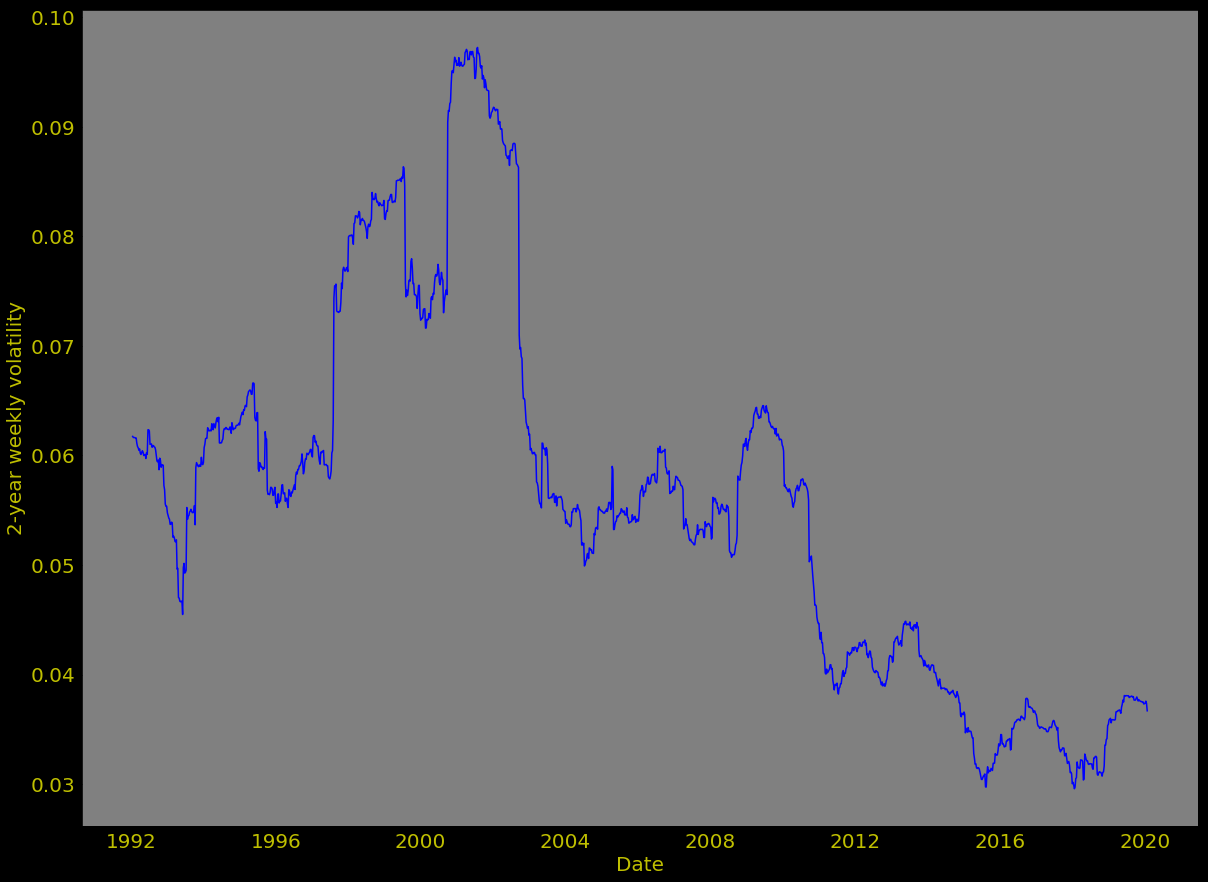

In [34]:
plt.figure(figsize=(20,15))
plt.plot(weekly_2Y_vol, 'b')
plt.xticks(color='y', size=20)
plt.yticks(color='y', size=20)
plt.xlabel("Date", size=20, color='y')
plt.ylabel("2-year weekly volatility", size=20, color='y')
plt.show()

In [35]:
# Sélection d'un secteur
info_df = pd.read_csv("/Users/macbookpro_anas/Desktop/Destroy Inflation/DestroyInflation-master/info_df.csv", index_col=0, sep="\t")
info_df['Sector'] = info_df.Sector.apply(lambda x: x.replace('\n',''))
info_df.Sector.unique()

ParserError: Error tokenizing data. C error: Expected 1 fields in line 3, saw 2


In [ ]:
from tqdm.notebook import tqdm as tqdm
from copy import deepcopy
import re

sectors = list(info_df.Sector.unique())
sector_vol = dict()
sector_return = dict()


for sector in sectors:
    #print(sector)
    # Récupération de tous les tickers faisant partie d'un secteur donné
    sector_tickers = list(info_df[info_df.Sector==sector].Ticker)
    sector_tickers = [ticker for ticker in sector_tickers if len([m.start() for m in re.finditer('\W+\.\W', ticker)])==0]
    sector_tickers = [ticker for ticker in sector_tickers if '.' not in ticker]
    #print(len(sector_tickers))
    # Stockage des données des stocks du secteur considéré
    data = dict()
    for ticker in sector_tickers:
        try:
            local = pd.read_csv("/Users/macbookpro_anas/Desktop/Destroy Inflation/DestroyInflation-master/stock_data/{}.csv".format(ticker))
            data[ticker] = local.iloc[-252*30:]
        except:
            pass
    # Calcul de la volatilité mensuelle sur 2 ans pour chaque stock du secteur concerné
    vol_data = dict()
    return_data = dict()
    for ticker in sector_tickers:
        local = data[ticker]
        local['Date'] = pd.to_datetime(local.Date) # Transformer la date au format pandas
        local = local.set_index('Date') # On met la date en indice pour pouvoir resample
        local_vol = local.resample('1W').agg({'Open': (lambda x: x.iloc[0]),
                                              'High': 'max',
                                              'Low': 'min',
                                              'Close': (lambda x: x.iloc[-1]),
                                              'Adj Close': (lambda x: x.iloc[-1]),
                                              'Volume': 'sum'})
        local_vol = local_vol['Adj Close'].rolling(window=104).apply(lambda x: (x[1:]/x[:-1] - 1).std()).dropna()
        vol_data[ticker] = deepcopy(local_vol)
        
        local_ret = local.resample('1W').agg({'Adj Close': (lambda x: x.iloc[-1])})
        local_ret = local_ret.rolling(window=2).apply(lambda x: x[1]/x[0] - 1.)
        return_data[ticker] = deepcopy(local_ret)
    sector_vol[sector] = deepcopy(vol_data)
    sector_return[sector] = deepcopy(return_data)

Industrials
Computing monthly returns
49
49
49
49
49
49
49
49
49
49
49
50
50
50
50
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
51
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
52
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
53
54
54
55
55
56
56
56
56
56
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
58
59
59
59
59
59
60
61
61
61
61
61
61
61
61
61
61
61
61
61
61
61
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
62
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
63
64
64
65
65
65
65
65
65
66
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
67
68
68
68
68
68
68
68
69
69
69
69
69
69
69
69
69
69
69
69
69
69
69

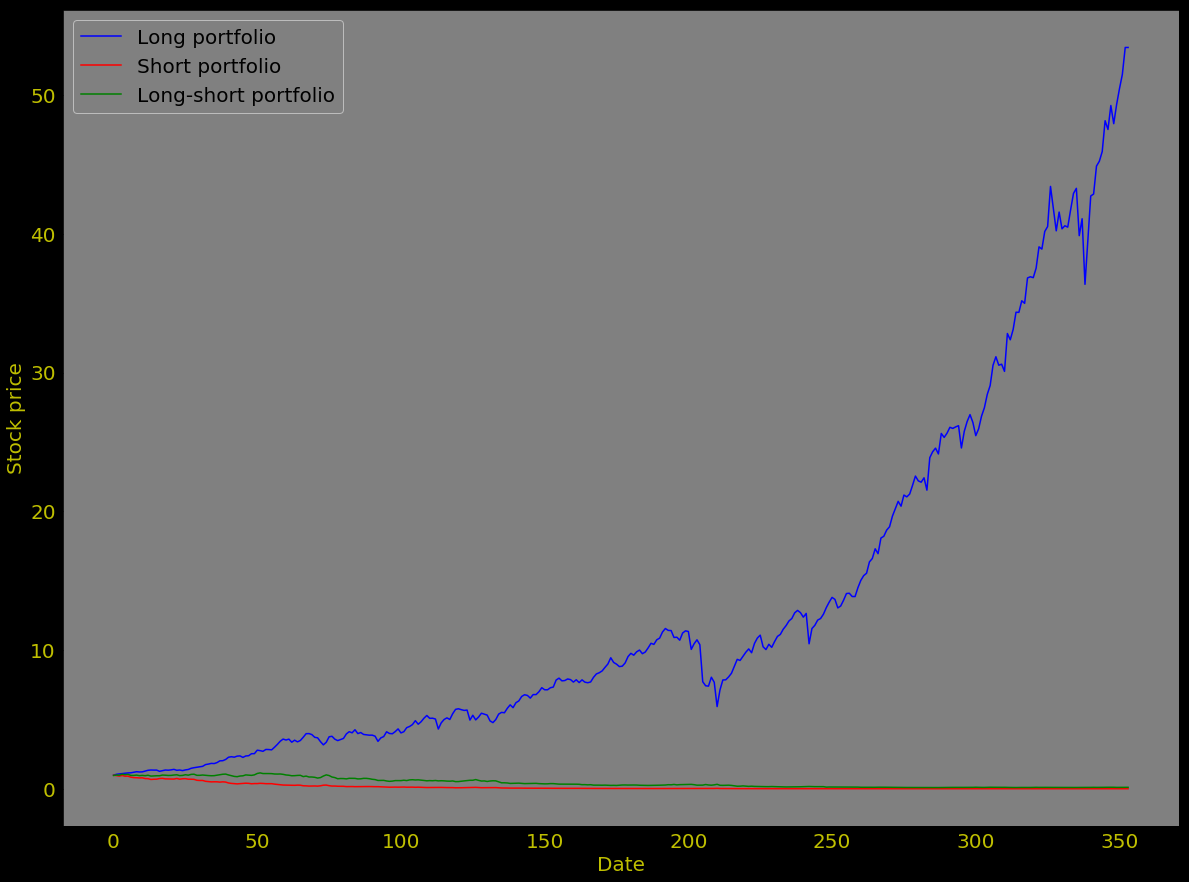

Average yearly returns : 15.73%


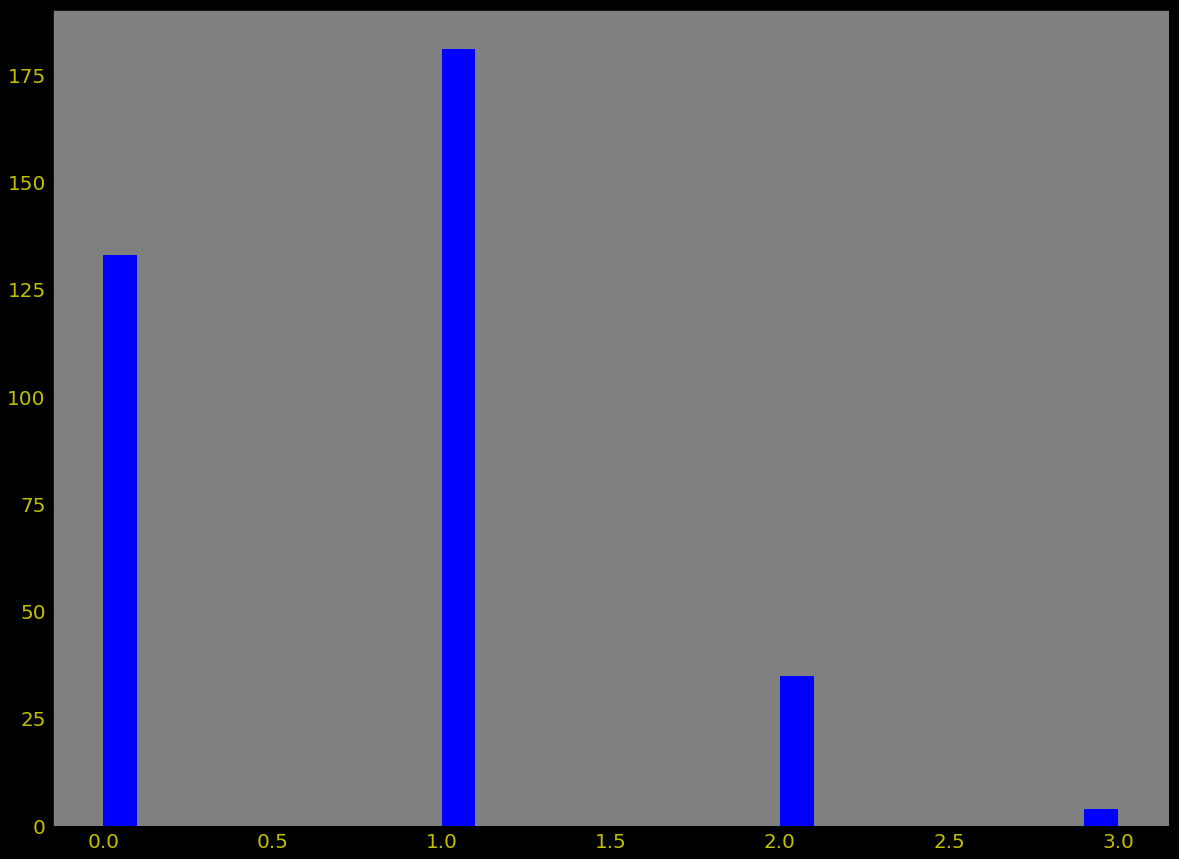

Health Care
Computing monthly returns
30
30
30
31
31
31
32
33
33
34
34
34
35
35
36
36
36
36
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
38
39
39
39
39
39
39
39
39
39
39
39
39
39
40
40
40
40
40
41
41
42
42
42
42
42
42
45
45
45
45
46
46
46
46
46
46
46
46
46
46
46
47
47
47
47
47
47
47
47
47
47
47
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
48
49
49
49
49
50
50
50
51
51
52
52
52
52
52
52
53
53
53
53
53
53
53
54
54
54
55
55
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
56
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
57
58
59
59
59
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60
60

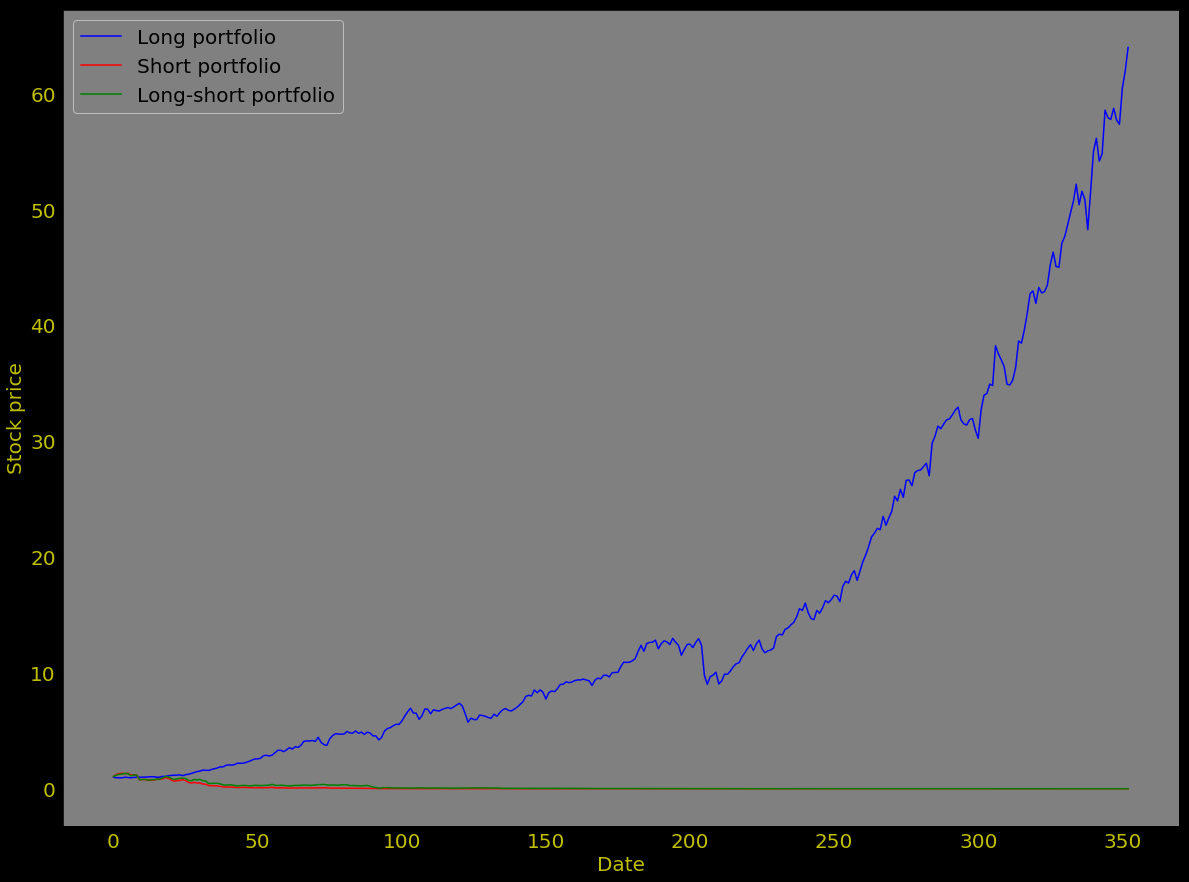

Average yearly returns : 16.55%


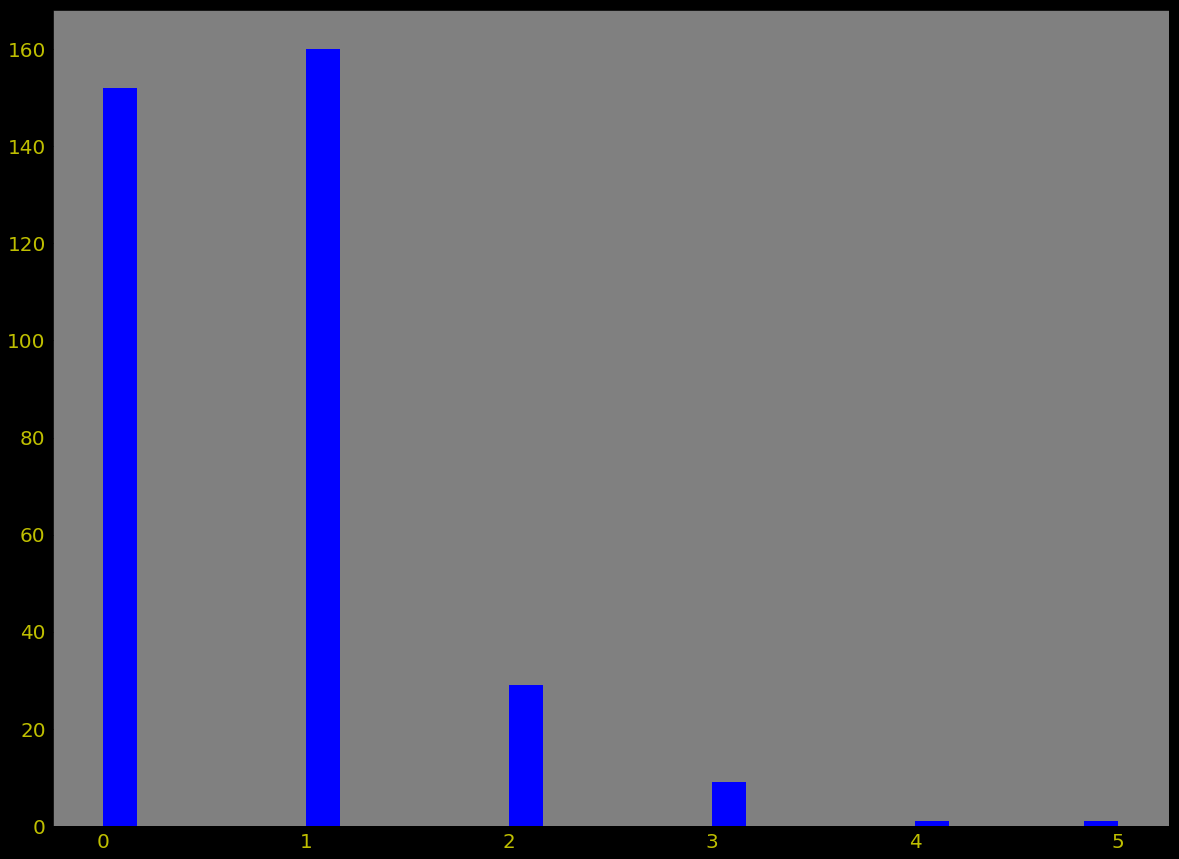

In [47]:
for sector in sector_vol.keys():
    print(sector)
    local_vol = sector_vol[sector]
    local_vol = pd.DataFrame(local_vol).iloc[51:]
    local_ret = sector_return[sector]
    bot_quint = []
    top_quint = []
    bot_returns = []
    top_returns = []
    #print(type(local_vol))
    #print(local_vol)
    print("Computing monthly returns")
    for i in range(0, local_vol.shape[0], 4):
        date = local_vol.index[i]
        #print(date)
        local_score = list(local_vol.iloc[i].dropna().sort_values(ascending=True).index)
        print(len(local_score))
        top_quint.append(local_score[:int(len(local_score) * 0.2)])
        #print(top_quint)
        bot_quint.append(local_score[-int(len(local_score) * 0.2):])
        top_returns.append(dict({ticker: ((1+local_ret[ticker].loc[date:].shift(-1).iloc[:4]).prod() - 1).iloc[0] for ticker in top_quint[-1]}))
        bot_returns.append(dict({ticker: ((1+local_ret[ticker].loc[date:].shift(-1).iloc[:4]).prod() - 1).iloc[0] for ticker in bot_quint[-1]}))
        
    long_returns = np.array([pd.Series(tr).mean() for tr in top_returns])
    short_returns = np.array([-pd.Series(br).mean() for br in bot_returns])
    long_pf = (1+long_returns).cumprod()
    short_pf = (1+short_returns).cumprod()
    long_short = (1 + long_returns + short_returns).cumprod()
    
    plt.figure(figsize=(20,15))
    plt.plot(long_pf, color='b', label='Long portfolio')
    plt.plot(short_pf, color='r', label='Short portfolio')
    plt.plot(long_short, color='g', label='Long-short portfolio')
    plt.xticks(color='y', size=20)
    plt.yticks(color='y', size=20)
    plt.xlabel("Date", size=20, color='y')
    plt.ylabel("Stock price", size=20, color='y')
    plt.legend(fontsize=20)
    plt.show()
    
    print("Average yearly returns : {:.02f}%".format(100 * (long_pf[-1]**(13./len(long_pf)) - 1)))
    
    turnover = []
    for i in range(len(top_quint)-1):
        old = top_quint[i]
        new = top_quint[i+1]
        turnover.append(len(set(new).difference(old)))

    plt.figure(figsize=(20,15))
    plt.hist(turnover, color='b', bins=30)
    plt.xticks(color='y', fontsize=20)
    plt.yticks(color='y', fontsize=20)
    plt.show()

In [21]:
4**(1/12)

1.122462048309373